In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#압축풀기
import zipfile

local_zip = '/content/drive/MyDrive/데이터저장/대회/감정인식.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/')
zip_ref.close()

# 데이터확인

In [4]:
ex=pd.read_csv('/content/open/sample_submission.csv')
ex

,ID,Target
0,TEST_0000,NAN
1,TEST_0001,NAN
2,TEST_0002,NAN
3,TEST_0003,NAN
4,TEST_0004,NAN
...,...,...
2605,TEST_2605,NAN
2606,TEST_2606,NAN
2607,TEST_2607,NAN
2608,TEST_2608,NAN


In [5]:
df=pd.read_csv('/content/open/train.csv')
df

,ID,Utterance,Speaker,Dialogue_ID,Target
0,TRAIN_0000,also I was the point person on my company’s tr...,Chandler,0,neutral
1,TRAIN_0001,You must’ve had your hands full.,The Interviewer,0,neutral
2,TRAIN_0002,That I did. That I did.,Chandler,0,neutral
3,TRAIN_0003,So let’s talk a little bit about your duties.,The Interviewer,0,neutral
4,TRAIN_0004,My duties? All right.,Chandler,0,surprise
...,...,...,...,...,...
9984,TRAIN_9984,You or me?,Chandler,1038,neutral
9985,TRAIN_9985,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,1038,neutral
9986,TRAIN_9986,"You guys are messing with me, right?",Joey,1038,surprise
9987,TRAIN_9987,Yeah.,All,1038,neutral


In [6]:
set(df['Target']) #감정 총 7개 분류해야할거 7개

{'anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'}

In [ ]:
set(df['Speaker'])

In [7]:
df.isnull().sum()

ID             0
Utterance      0
Speaker        0
Dialogue_ID    0
Target         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           9989 non-null   object
 1   Utterance    9989 non-null   object
 2   Speaker      9989 non-null   object
 3   Dialogue_ID  9989 non-null   int64 
 4   Target       9989 non-null   object
dtypes: int64(1), object(4)
memory usage: 390.3+ KB


# 행/열 정리

In [9]:
x_data=df[['Utterance','Speaker','Dialogue_ID']]
x_data

,Utterance,Speaker,Dialogue_ID
0,also I was the point person on my company’s tr...,Chandler,0
1,You must’ve had your hands full.,The Interviewer,0
2,That I did. That I did.,Chandler,0
3,So let’s talk a little bit about your duties.,The Interviewer,0
4,My duties? All right.,Chandler,0
...,...,...,...
9984,You or me?,Chandler,1038
9985,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,1038
9986,"You guys are messing with me, right?",Joey,1038
9987,Yeah.,All,1038


In [10]:
y_data=df['Target']
type(y_data)

pandas.core.series.Series

In [11]:
x_data.shape, y_data.shape

((9989, 3), (9989,))

# 시각화

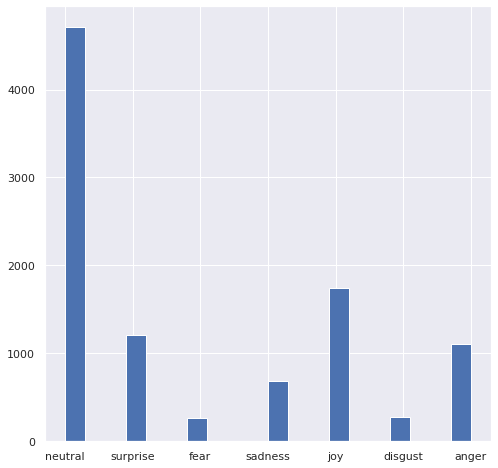

In [12]:
y_data.hist(figsize=(8,8), bins=20)

plt.show()

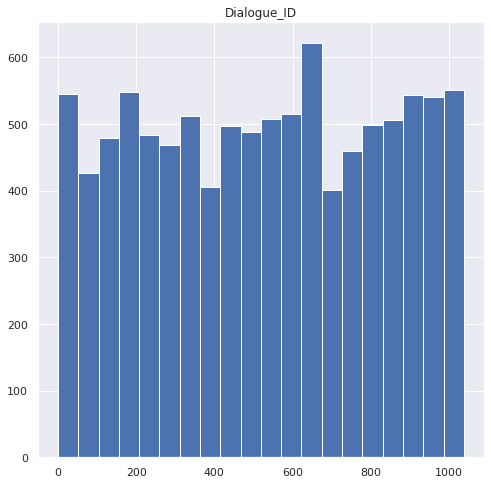

In [13]:
x_data.hist(figsize=(8,8), bins=20)

plt.show()

In [14]:
x_describe=x_data['Dialogue_ID'].describe()
x_describe

count    9989.000000
mean      526.549304
std       302.464741
min         0.000000
25%       261.000000
50%       531.000000
75%       795.000000
max      1038.000000
Name: Dialogue_ID, dtype: float64

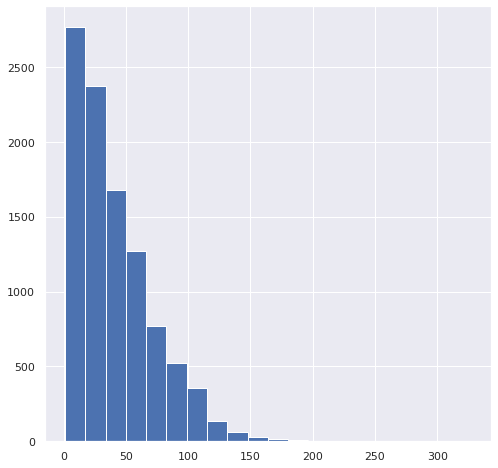

In [15]:
#문장길이 확인
sentence_len= x_data['Utterance'].apply(len) #apply 함수 column의 각 index의 value들을 계산하여 추가 하는 함수 
#즉 여기서는 len으로 각 index의 글자수를 보여줌
sentence_len.hist(figsize=(8,8), bins=20)

plt.show()

In [ ]:
set(sentence_len)

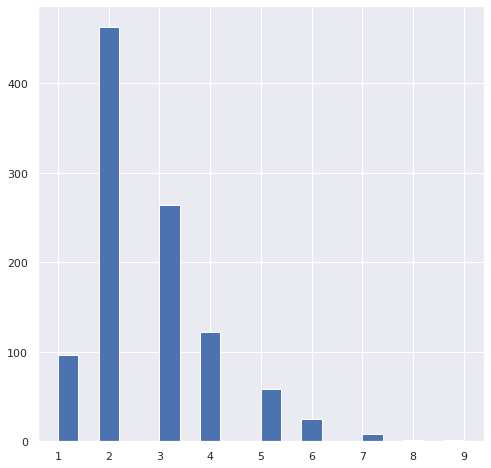

In [21]:
#speakers per dialogue
tmp = x_data[['Dialogue_ID','Speaker']].drop_duplicates()['Dialogue_ID'].value_counts()#drop_duplicates는 중복행 제거 메서드
#즉 Dialogue_ID와 Speaker의 열에 대해서 중복값을 검사해서  Dialogue_ID의 값들을 카운터해서 보여줌 (즉 Dialogue_ID와 Speaker의 값이 같으면 카운터 +1  )
tmp.hist(figsize=(8,8), bins=20)
plt.show()

In [22]:
tmp

902    9
354    8
682    7
615    7
915    7
      ..
566    1
567    1
419    1
417    1
91     1
Name: Dialogue_ID, Length: 1038, dtype: int64

# Encoding

In [ ]:
y_copy=y_data

In [ ]:
y_copy= pd.DataFrame(y_copy, columns=['Target'])
y_copy

,Target
0,neutral
1,neutral
2,neutral
3,neutral
4,surprise
...,...
9984,neutral
9985,neutral
9986,surprise
9987,neutral


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le=LabelEncoder()
enc = OneHotEncoder(sparse=False)

y_copy=le.fit_transform(y_copy)
y_copy

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4, 4, 4, ..., 6, 4, 3])

In [ ]:
y_copy.shape

(9989,)

In [ ]:
y_copy=pd.DataFrame(y_copy, columns=['Target'])
y_copy

,Target
0,4
1,4
2,4
3,4
4,6
...,...
9984,4
9985,4
9986,6
9987,4


# 새 섹션